# Project Description

    Goals : Analyze the game review and user rating data in 2016, identify the pattern whether a game is successfull or not, find the most potential games and plan a campaign for 2017
    
    note : the data is from ESRB (Entertainment Software Rating Board), ESRB is a self-regulatory organization that evaluate game content and provides age rating such as teenager or adults
    

## Open file and general information
File path:
- /datasets/games.csv

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,ttest_ind

import warnings
warnings.filterwarnings ('ignore')

In [2]:
# call the dataset and save it into df_games DataFrame
df_games = pd.read_csv ('/datasets/games.csv')

## Data preparation
- fix column names to lowercase
- convert data type to proper data types
- describe which column types have been changed and give the reason
- handle missing value:
  - explain why to fill the missing value or keep it blank
  - explain why the values are missing and give possible reason
  - how to handle the term 'TBD' (to be determined) and determine how will cope with this such cases
- calculate total sales ( the numbers of sales in all territories) for each game

### Cheking dataset df_games

In [3]:
#dataset info 
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#dataset shape
df_games.shape

(16715, 11)

In [5]:
#chek dataset df_games
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#chek unique value in the columns Year_of_Release
df_games['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

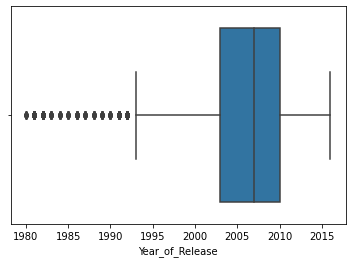

In [7]:
#chek boxplot columns Year_of_Release
sns.boxplot(df_games['Year_of_Release']);

In [8]:
#chek unique value in columns Critic_Score 
df_games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

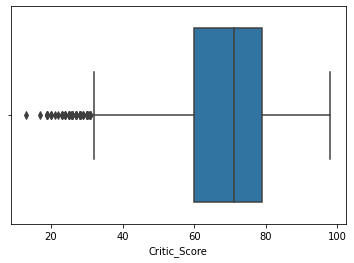

In [9]:
#cek boxplot pada kolom Critic_Score
sns.boxplot(df_games['Critic_Score']);

In [10]:
#chek unique value in columns User_Score
df_games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
#chek unique value in columns Rating
df_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
#dataset description
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [13]:
#dataset missing values 
df_games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [14]:
#check data duplicate
df_games.duplicated().sum()

0

Findings :
- Total dataset is 16715 row and columns
- some text column names are vary in upper and lowercase
- data type of 'Year_of_Release' using float
- there are some missing values in columns 'Year_of_Release','Critic_Score','User_Score' and 'Rating'
- columns 'User_Score' has 'nan' and 'tbd' values
- no duplicated data
- there are no outlier in columns 'Year_of_Release'and 'Critic_Score'


### Data engineering

From checking the dataset, there are several things that must be followed up as follows:
- change all text columns to lower case
- change column data type 'Year_of_Release' from float to integer
- handling the missing values in the columns 'Year_of_Release','Critic_Score','Rating' :
  - columns 'Year_of_Release' : 'nan' values will be filled with median data '2007'
  - columns 'Critic_Score' : 'nan' values will be filled with median data '71'
  - columns 'Rating' : 'nan' value will be remain it 'nan' because will not evaluate further for 2017 rating
  - columns 'User_Score' :
   - 'tbd' will be filled with 'nan' value, becouse 'tbd' means not defined yet so it same with 'nan' value
   - change the data type 'User_Score' form object to float

In [15]:
#change all text columns to lowercase
df_games.columns = df_games.columns.str.lower()
df_games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [16]:
#columns 'Year_of_Release' : 'nan' values will be filled with median data '2007' and change to integer datatype
df_games['year_of_release'] = df_games['year_of_release'].fillna('2007').astype(int)
df_games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [17]:
#columns 'critic_score' : 'nan' values will be filled with median data '71' and change to integer datatype
df_games['critic_score'] = df_games['critic_score'].fillna('71').astype(int)

In [18]:
df_games['platform'] =  df_games['platform'].astype(str)

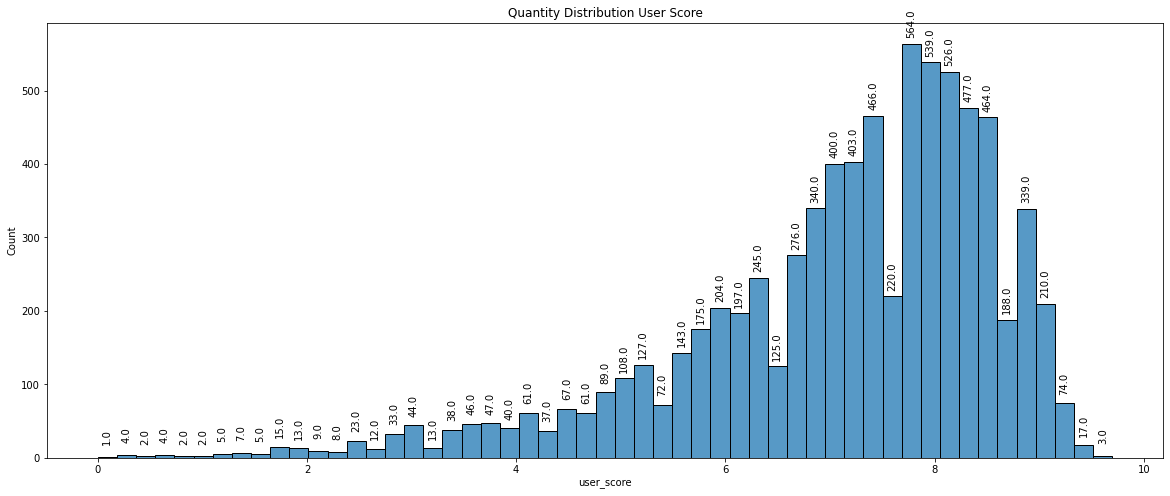

In [19]:
#replace 'tbd' values in the columns'user_score' with 'nan' value and change to float datatype
df_games['user_score'] = df_games['user_score'].replace('tbd','nan').astype(float)

#chek the data distribution columns 'user_score'
fig, ax = plt.subplots(figsize=(20, 8))
splot = sns.histplot(df_games['user_score'])
plt.title('Quantity Distribution User Score')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')
plt.show()


<AxesSubplot:xlabel='user_score'>

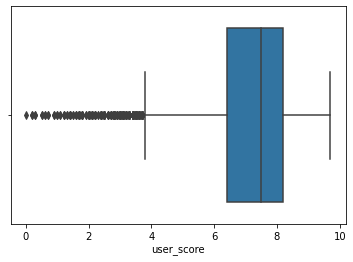

In [20]:
#check boxplot of columns 'user_score'
sns.boxplot(df_games['user_score'])

In [21]:
#describe the dataset df_games
df_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,7590.000000
mean,2006.492911,0.263377,0.145060,0.077617,0.047342,70.010649,7.125046
std,5.829925,0.813604,0.503339,0.308853,0.186731,9.777494,1.500006
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,71.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,71.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


### calculate total sales ( the numbers of sales in all territories) for each game

In [22]:
#calculate the 'total_sales'
df_games['total_sales'] = df_games['na_sales']+df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71,NaN,NaN,0.01


## Data analysis 

- Review how many games were released in different years. Is the data in each period significant?
- See how sales vary from platform to platform. Choose the platform with the largest total sales and make its distribution based on data per year. Discover platforms that used to be popular but now don't have any sales. How long does it generally take for new platforms to emerge and old platforms to fade in popularity?
- Specify the time period for which data is retrieved. See answer from previous question. The data would be used to build a benchmark for 2017. used only with relevant data and ingnore the previous years
-  Which platforms have the most sales? Which platforms are growing or shrinking? Choose a few platforms that have the potential to make a profit.
- Create a boxplot for the global sales of all games grouped by platform. Is the difference in sales significant? What about average sales on various platforms? Describe it.
- Take a look at how user reviews and professionals affect sales on one of the popular platforms (the one you choose). Make a scatter plot and calculate the correlation between reviews and sales. Get the conclusions.
- Compare the sales of the same game on other platforms.
- Observe the general distribution of games by genre. What can we conclude about the most profitable genres? Describe and generalize genre-related with high and low sales?

### Review how many games were released in different years. Is the data in each period significant?

In [23]:
#create dataset game_release base on year_of_release of df_games dataset
game_release = df_games.groupby(['year_of_release']).agg({'name' : 'count'}).reset_index().rename(columns={'name':'game_count'})
game_release

,year_of_release,game_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


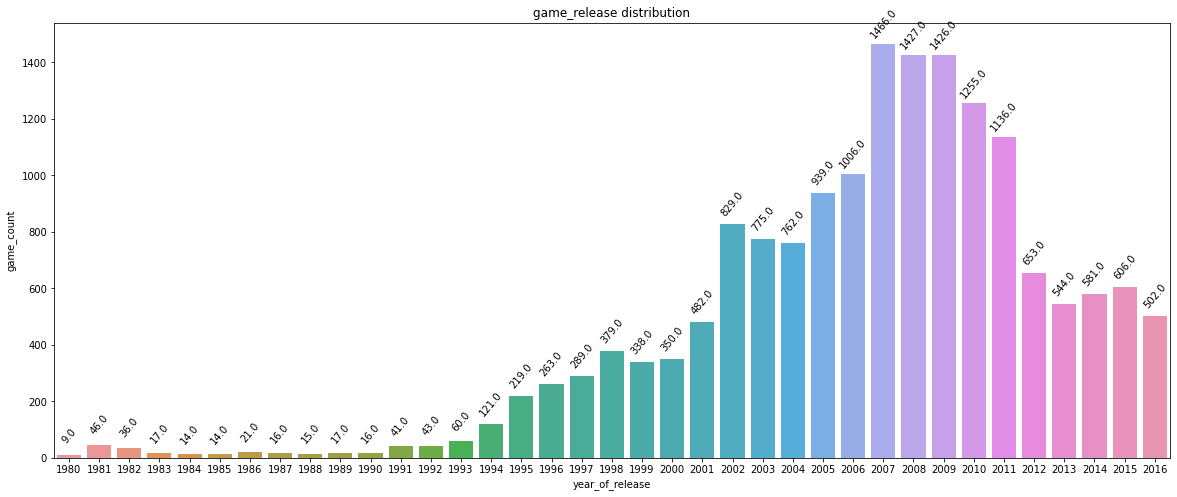

In [24]:
# check game_release distribution
fig, ax = plt.subplots(figsize=(20, 8))

splot = sns.barplot(data = game_release, x='year_of_release', y='game_count')
plt.title('game_release distribution')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=50, 
                   textcoords = 'offset points')
plt.show()

Findings
- base on the distribution of the game_count vs year_of_release, we can see that starting 1997, every 5 years game count was changed signifcantly (around 400 )
- 2001 to 2002 game count was increased from 482 to 829
- 2006 to 2007 game count was increased from 1006 to 1466
- 2011 to 2012 game count was decreased from 1136 to 635

### Game platform analysis

See how sales vary from platform to platform. Choose the platform with the bigges total sales and make its distribution based on data per year. Discover platforms that used to be popular but now don't have any sales. How long does it generally take for new platforms to emerge and old platforms to fade in popularity?

In [25]:
#game total_sales base on platform
df_games.groupby(['platform']).agg({'total_sales' : 'sum'}).sort_values('total_sales', ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Findings
- biggest total sales is PS2 = 1255.77 milion USD
- lowest total sales is PCFX = 0.03 milion USD

In [26]:
#creating dataset df_games_PS2 for biggest total sales platform
df_games_PS2 = df_games[df_games['platform'] =='PS2'].reset_index(drop=True)
df_games_PS2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
1,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
2,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
3,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
4,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
2156,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,71,NaN,NaN,0.01
2157,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,71,NaN,NaN,0.01
2158,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,71,NaN,NaN,0.01
2159,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,71,NaN,NaN,0.01


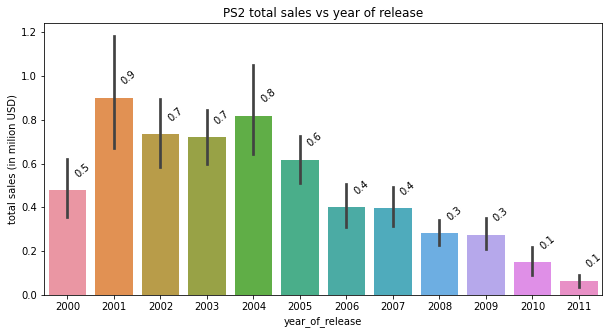

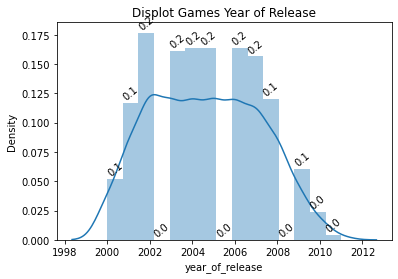

In [78]:
#chek sales distribution of 'PS2'
fig, ax = plt.subplots(figsize=(10, 5))
splot = sns.barplot(data = df_games_PS2, x='year_of_release', y='total_sales')
plt.title ('PS2 total sales vs year of release')
plt.ylabel('total sales (in milion USD)')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (15, 20), rotation=40, 
                   textcoords = 'offset points')
plt.show()
splot = sns.distplot(df_games_PS2['year_of_release'])
plt.title('Displot Games Year of Release')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), rotation=40, 
                   textcoords = 'offset points')
plt.show()

In [28]:
df_games_PS2.groupby(['platform','year_of_release']).agg({'total_sales' : 'sum'}).reset_index()

,platform,year_of_release,total_sales
0,PS2,2000,39.17
1,PS2,2001,166.43
2,PS2,2002,205.38
3,PS2,2003,184.31
4,PS2,2004,211.81
5,PS2,2005,160.66
6,PS2,2006,103.42
7,PS2,2007,98.20
8,PS2,2008,53.90
9,PS2,2009,26.40


Finding
- PS2 sales starting in 2000 with total sales 39.17 milion USD
- PS2 sales finished in 2011 with total sales 0.45 milion USD
- PS2 lifetime is 12 years

In [29]:
#find the game platform lifetime
df_lifetime = pd.pivot_table(df_games, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0).astype('int')
df_lifetime

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_lifetime.columns

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='platform')

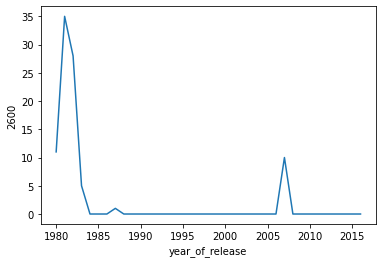

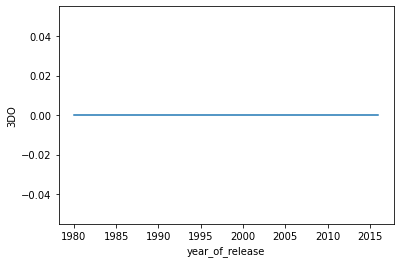

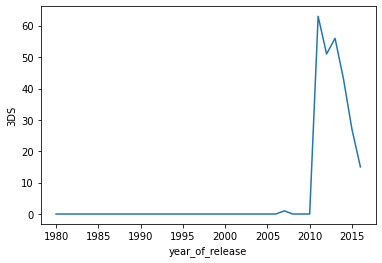

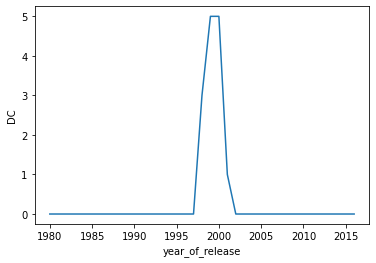

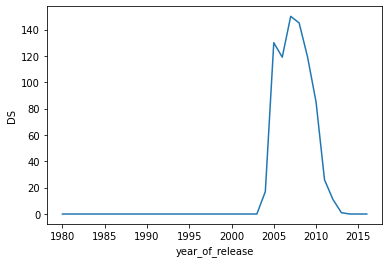

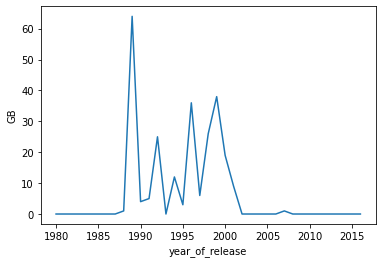

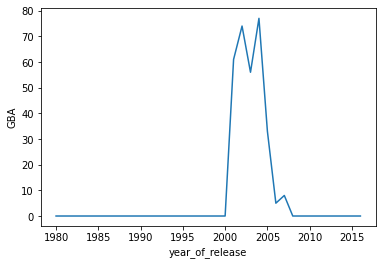

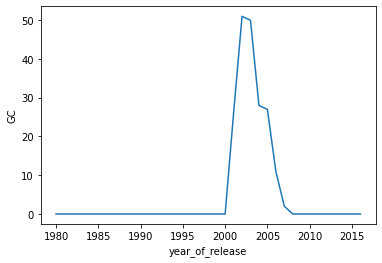

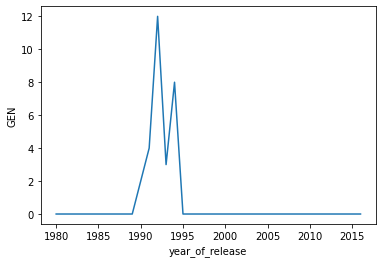

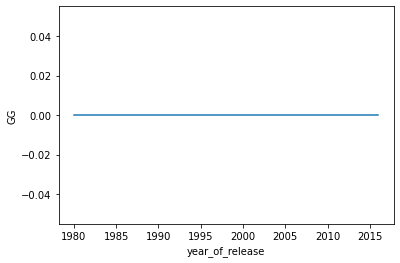

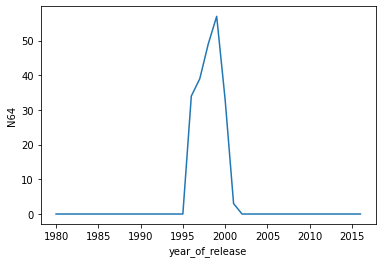

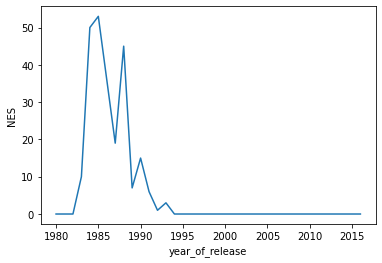

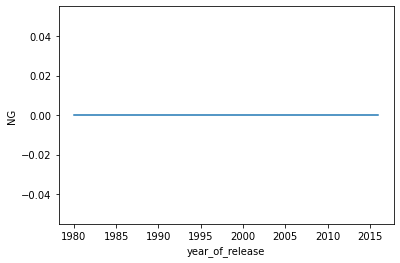

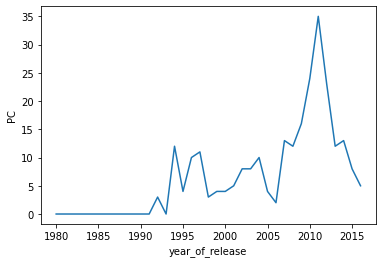

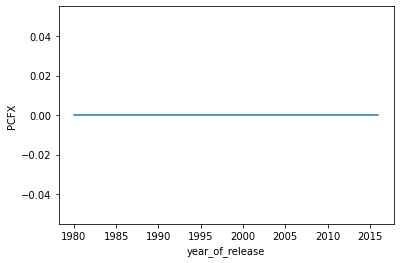

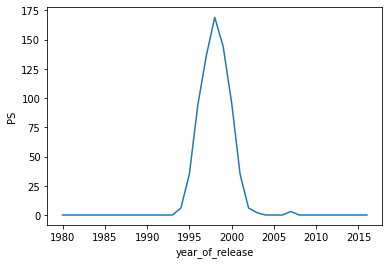

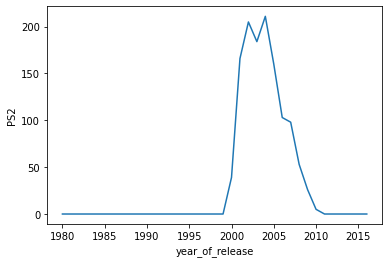

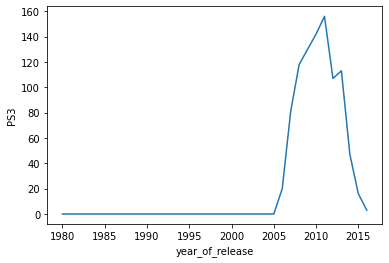

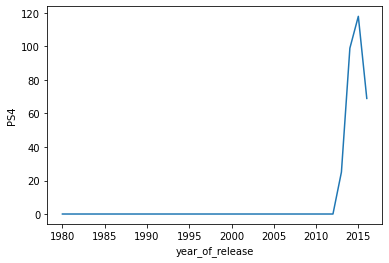

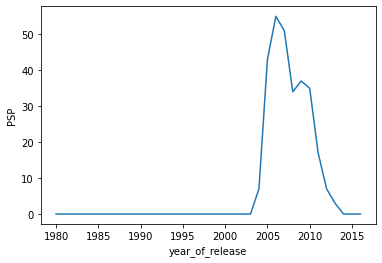

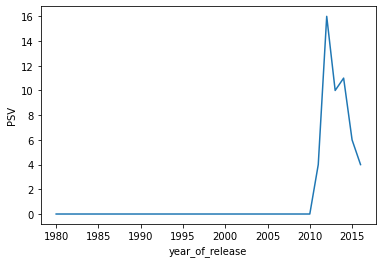

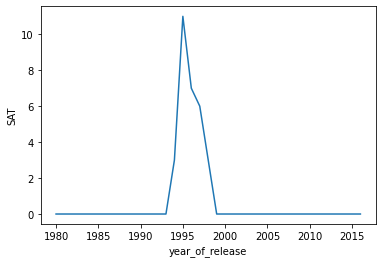

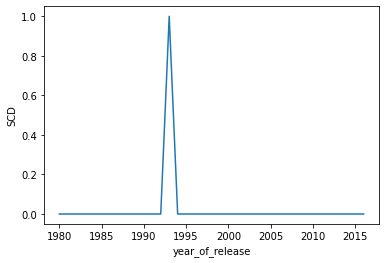

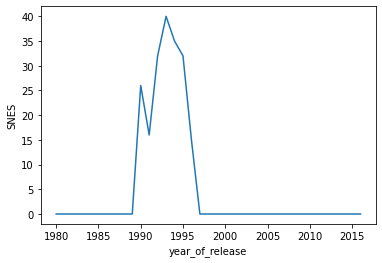

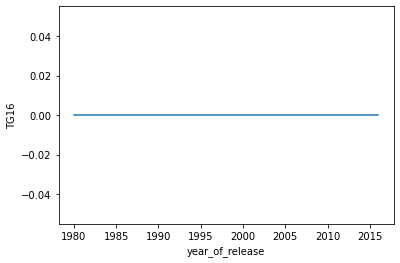

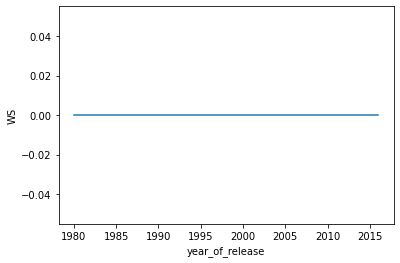

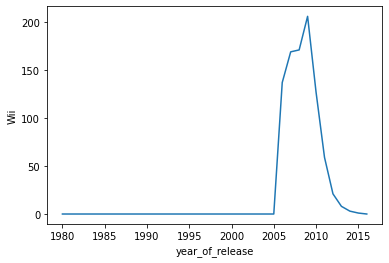

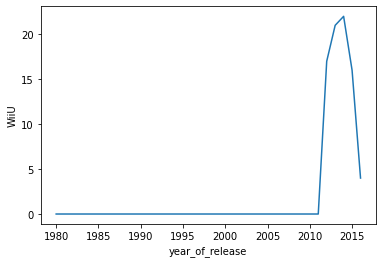

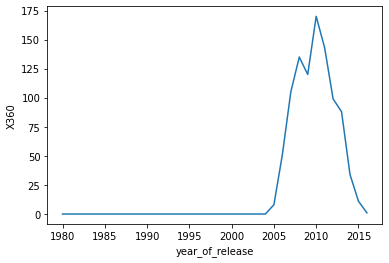

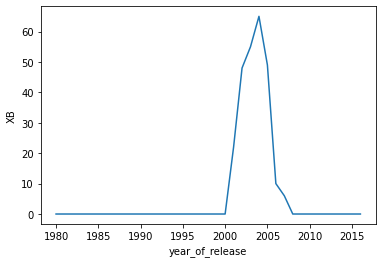

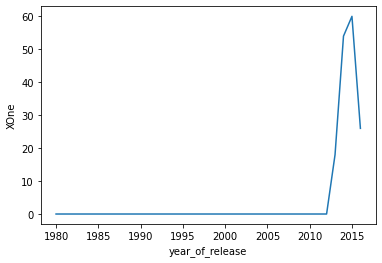

In [31]:
#cek distribusi dari masing2 platform
sns.lineplot(data = df_lifetime, x='year_of_release', y='2600')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='3DO')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='3DS')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='DC')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='DS')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='GB')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='GBA')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='GC')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='GEN')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='GG')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='N64')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='NES')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='NG')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='PC')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='PCFX')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='PS')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='PS2')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='PS3')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='PS4')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='PSP')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='PSV')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='SAT')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='SCD')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='SNES')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='TG16')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='WS')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='Wii')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='WiiU')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='X360')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='XB')
plt.show()
sns.lineplot(data = df_lifetime, x='year_of_release', y='XOne')
plt.show()

Note :
- Platforms that used to be popular but now don't have any sales :
  - 2600
  - DC
  - DS
  - GB
  - GBA
  - GC
  - GEN
  - N64
  - NES
  - PS
  - PS2
  - PSP
  - SAT
  - SCD
  - SNFS
  - Wii
  - XB
  
- Platforms don't have any sales from beginning :
  - 3DO
  - GG
  - NG
  - PCFX
  - TG16
  - WS
- in general, new game platforms will be emerging every 3 years and old platforms fade the popularity within 5 - 10 years
- seems that every 5 years the game behaviour were changing


### Determine the data collection period to develop benchmarks for the upcoming year

Based on the previous data analysis we decided to used last 5 years data for developing benchmark for upcoming years

In [32]:
# game dataset last 5 year
df_games_last_5_years = df_games[df_games['year_of_release'].astype(str) > '2011'].reset_index()
df_games_last_5_years.sort_values('year_of_release', ascending=False)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1443,9722,Gundam Breaker 3,PSV,2016,Action,0.00,0.00,0.12,0.00,71,NaN,NaN,0.12
1518,10254,Batman: Return to Arkham,XOne,2016,Action,0.05,0.05,0.00,0.01,77,8.2,T,0.11
1533,10371,WWE 2K17,X360,2016,Sports,0.05,0.04,0.00,0.01,71,NaN,T,0.10
1541,10403,Skylanders Imaginators,PS3,2016,Platform,0.02,0.07,0.00,0.02,71,NaN,E10+,0.11
1542,10405,Fate/Extella: The Umbral Star,PS4,2016,Action,0.00,0.00,0.11,0.00,71,NaN,T,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,14988,Kyokugen Dasshutsu ADV: Zennin Shiboudesu,PSV,2012,Adventure,0.00,0.00,0.03,0.00,71,NaN,NaN,0.03
1624,10916,Uta no Prince-Sama: Debut,PSP,2012,Adventure,0.00,0.00,0.09,0.00,71,NaN,NaN,0.09
2410,14994,Jewel Quest 5: The Sleepless Star,DS,2012,Action,0.00,0.02,0.00,0.00,71,NaN,NaN,0.02
220,1227,Call of Duty: Black Ops II,PC,2012,Shooter,0.64,0.69,0.00,0.19,74,4.2,M,1.52


### Games platforms analysis
Which platforms have the most sales? Which platforms are growing or shrinking? Choose a few platforms that have the potential to make a profit.

In [33]:
#platform with most sales in last 5 years
df_platform = df_games_last_5_years.groupby(['platform']).agg({'total_sales' : 'sum'}).sort_values('total_sales', ascending=False)
df_platform


,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [34]:
# Which platforms are growing or shrinking
df_lifetime_5_years = pd.pivot_table(df_games_last_5_years, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0).astype(int)
df_lifetime_5_years

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51,11,23,107,0,7,16,21,17,99,0
2013,56,1,12,113,25,3,10,8,21,88,18
2014,43,0,13,47,99,0,11,3,22,34,54
2015,27,0,8,16,118,0,6,1,16,11,60
2016,15,0,5,3,69,0,4,0,4,1,26


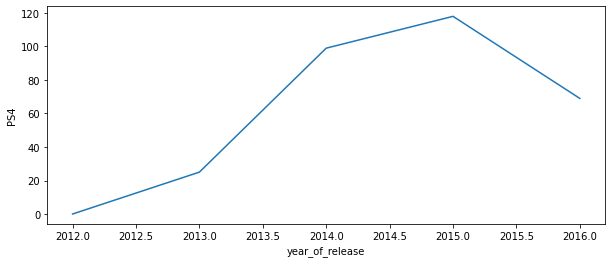

In [35]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='PS4')
plt.show()

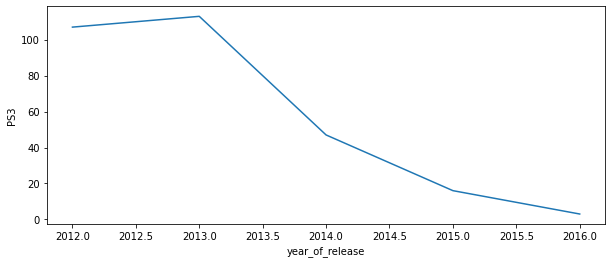

In [36]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='PS3')
plt.show()

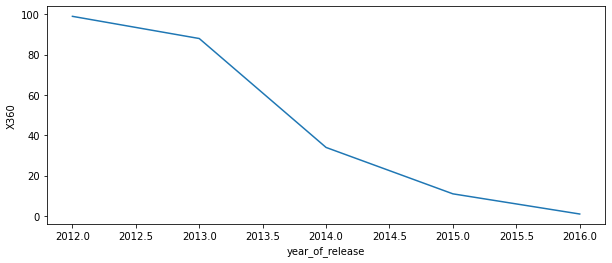

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='X360')
plt.show()

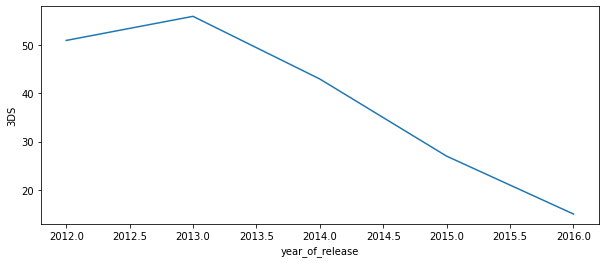

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='3DS')
plt.show()

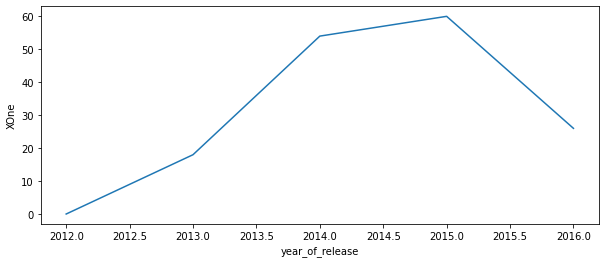

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='XOne')
plt.show()

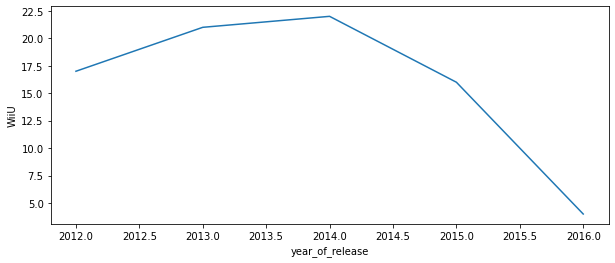

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='WiiU')
plt.show()

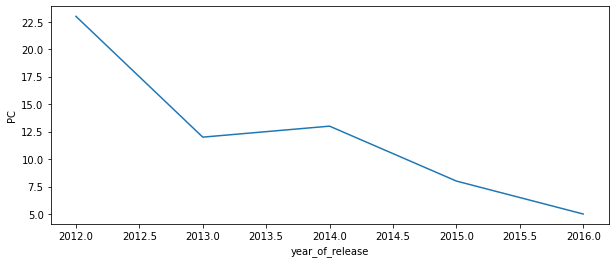

In [41]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='PC')
plt.show()

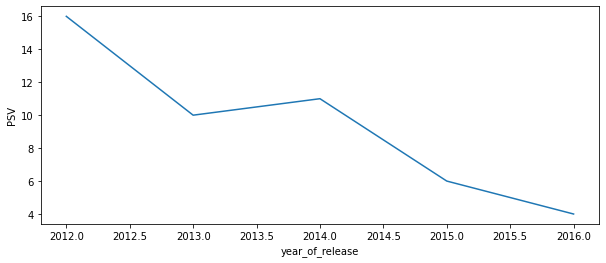

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='PSV')
plt.show()

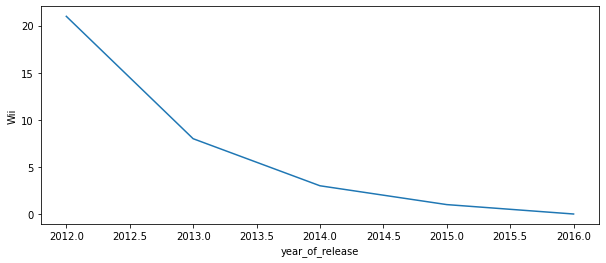

In [43]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='Wii')
plt.show()

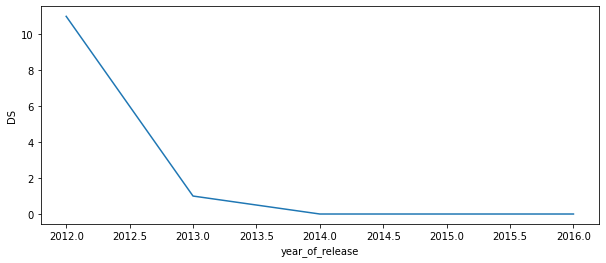

In [44]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='DS')
plt.show()

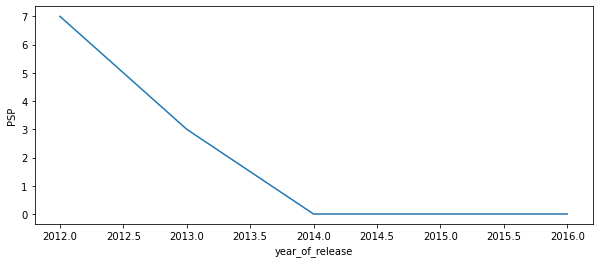

In [45]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(data = df_lifetime_5_years, x='year_of_release', y='PSP')
plt.show()

Findings :
- platform with most sales in last 5 years is PS4 with total sales = 314.14 milion USD
- growing platform in last 5 years :
  - Xone
  - PS4
- growing platform in last 5 years :
  - 3DS
  - DS
  - PC
  - PS3
  - PSP
  - PSV
  - Wii
  - WiiU
  - X360
  
Insight :
- platform that potentialy make a profit ( because of total sales and the lifetime )
  - PS4
  - PS3
  - X360
  - 3DS
  - Xone

### Boxplot for all games based on the platform distribution


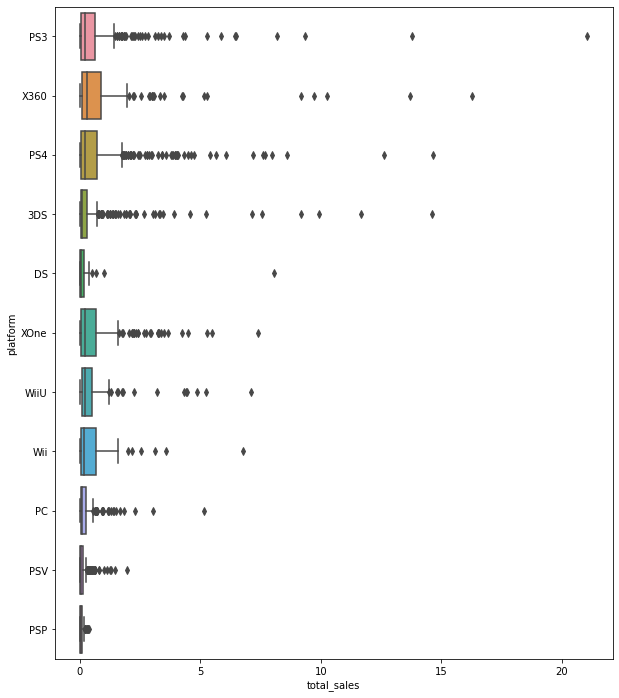

In [46]:
# Create a boxplot for the global sales of all games grouped by platform
fig, ax = plt.subplots(figsize=(10, 12))
sns.boxplot(data = df_games_last_5_years, x='total_sales', y='platform')
plt.show()

In [47]:
# sales average on various platforms
df_lifetime_5_years.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
mean,38.400000,2.400000,12.20000,57.200000,62.200000,2.000000,9.400000,6.600000,16.00000,46.600000,31.600000
std,17.082154,4.827007,6.83374,50.825191,49.413561,3.082207,4.669047,8.619745,7.17635,44.623985,25.115732
min,15.000000,0.000000,5.00000,3.000000,0.000000,0.000000,4.000000,0.000000,4.00000,1.000000,0.000000
25%,27.000000,0.000000,8.00000,16.000000,25.000000,0.000000,6.000000,1.000000,16.00000,11.000000,18.000000
50%,43.000000,0.000000,12.00000,47.000000,69.000000,0.000000,10.000000,3.000000,17.00000,34.000000,26.000000
75%,51.000000,1.000000,13.00000,107.000000,99.000000,3.000000,11.000000,8.000000,21.00000,88.000000,54.000000
max,56.000000,11.000000,23.00000,113.000000,118.000000,7.000000,16.000000,21.000000,22.00000,99.000000,60.000000


Findings :
- the most 5 highest games sales have significant value with the rest, the different value for 5th rank (Xone) with 6th rank (WiiU) up to 77 milion USD
- along with 5 most highest  sales, the mean value also indicating that 5 most highes sales has significantly different with the rest game, the different value for 5th rank (Xone) with 6th rank (WiiU) up to 35.4 milion USD

### User and Critic analysis

Take a look at how user reviews and professionals affect sales on one of the popular platforms (the one you choose). Make a scatter plot and calculate the correlation between reviews and sales. Get the conclusions.

In [48]:
df_games_last_5_years.head(2)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27


In [49]:
#analys the most popular platform PS4
df_games_scores_PS4 = df_games_last_5_years[df_games_last_5_years['platform']=='PS4'].reset_index().drop(columns=['genre','rating'])
df_games_scores_PS4

,level_0,index,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0,2,31,Call of Duty: Black Ops 3,PS4,2015,6.03,5.86,0.36,2.38,71,NaN,14.63
1,6,42,Grand Theft Auto V,PS4,2014,3.96,6.31,0.38,1.97,97,8.3,12.62
2,14,77,FIFA 16,PS4,2015,1.12,6.12,0.06,1.28,82,4.3,8.58
3,17,87,Star Wars Battlefront (2015),PS4,2015,2.99,3.49,0.22,1.28,71,NaN,7.98
4,18,92,Call of Duty: Advanced Warfare,PS4,2014,2.81,3.48,0.14,1.23,83,5.7,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
387,2803,16500,Root Letter,PS4,2016,0.00,0.00,0.01,0.00,69,7.5,0.01
388,2805,16503,Shin Hayarigami 2,PS4,2016,0.00,0.00,0.01,0.00,71,NaN,0.01
389,2814,16526,Dungeons 2,PS4,2016,0.01,0.00,0.00,0.00,61,7.9,0.01
390,2815,16530,Carmageddon: Max Damage,PS4,2016,0.01,0.00,0.00,0.00,51,5.5,0.01


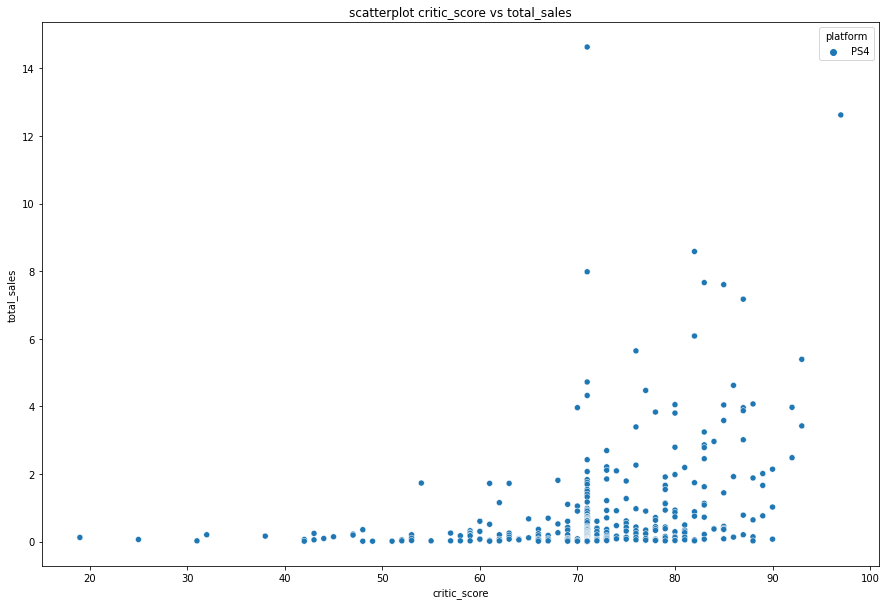

In [81]:
#scatterplot critic_score vs total_sales
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data = df_games_scores_PS4, x='critic_score', y='total_sales',hue='platform')
plt.title('scatterplot critic_score vs total_sales')
plt.show()

In [51]:
# calculate correlation between critic_score & total_sales
df_games_scores_PS4['critic_score'].corr(df_games_scores_PS4['total_sales'])

0.3387064530024634

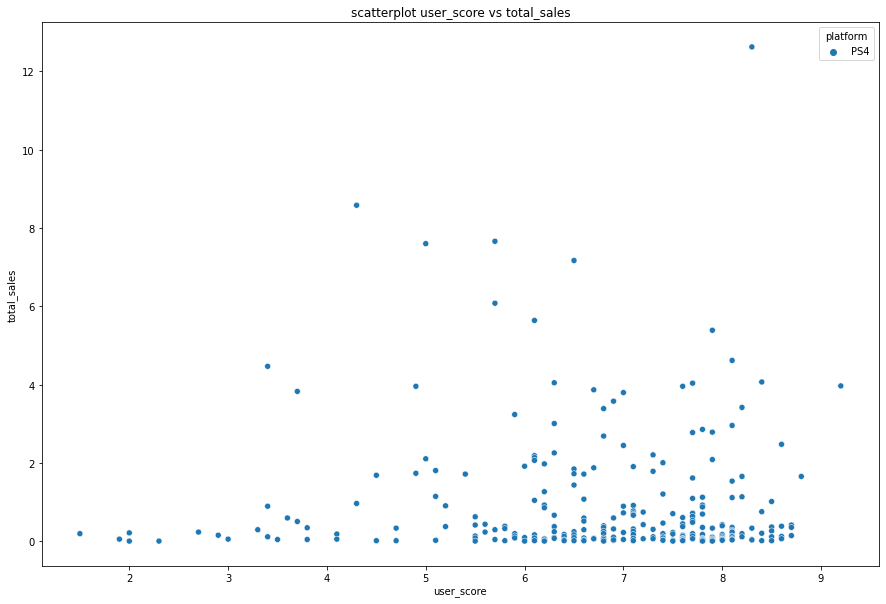

In [52]:
#scatterplot user_score vs total_sales
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data = df_games_scores_PS4, x='user_score', y='total_sales',hue='platform')
plt.title('scatterplot user_score vs total_sales')
plt.show()

In [53]:
# calculate correlation between user_score & total_sales
df_games_scores_PS4['user_score'].corr(df_games_scores_PS4['total_sales'])

-0.031957110204556424

- Findings :
  - correlation between critic_score & total_sales is 0.3387
  - correlation between user_score & total_sales is -0.03195
- Insight :
  - critic_score & total_sales as moderate postive corelation, its mean that critic score is not strong enough to the total sales, but the corelation is positive its mean that both of variable is goes up ( when critic sore higher and the total sales will be higher also)
  - user_score & total_sales as weak negative corelation, its mean that the user score is dificult to measure to the total sales, and negative value corelation meaning that the user score goes less and the total sales will be goes up

### Compare the sales game on other platform

In [54]:
#dataset same game name on other platform
df_games_same_name = pd.pivot_table(df_games_last_5_years, index='name', columns='platform', values='total_sales', aggfunc='sum').fillna(0).astype(float)
df_games_same_name.tail(5)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Zumba Fitness: World Party,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.23,0.0,0.00,0.24
Zyuden Sentai Kyoryuger: Game de Gaburincho!!,0.05,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
[Prototype 2],0.00,0.0,0.11,0.74,0.00,0.0,0.00,0.00,0.0,0.79,0.00
htoL#NiQ: The Firefly Diary,0.00,0.0,0.00,0.00,0.00,0.0,0.01,0.00,0.0,0.00,0.00
inFAMOUS: Second Son,0.00,0.0,0.00,0.00,2.79,0.0,0.00,0.00,0.0,0.00,0.00


### Genre data analysis
Observe the general distribution of games by genre. What can we conclude about the most profitable genres? Describe and generalize genre-related with high and low sales?

In [55]:
#general genre distribution data
df_games_genre = df_games_last_5_years.groupby(['genre']).agg({'total_sales' : 'sum'}).sort_values('total_sales',ascending=False).reset_index()
df_games_genre

,genre,total_sales
0,Action,441.12
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


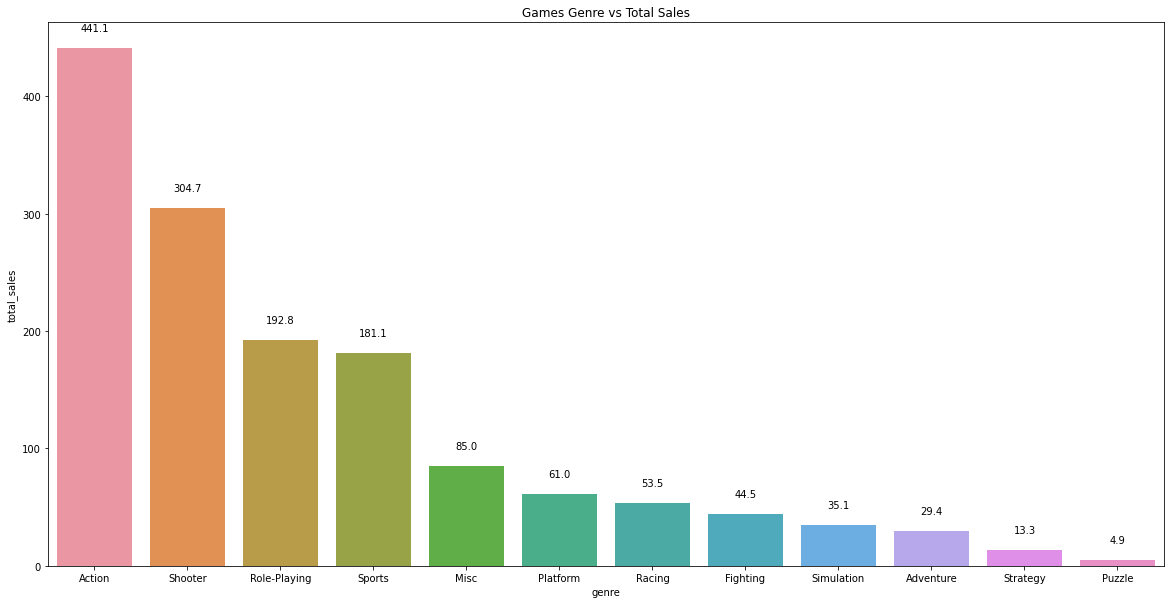

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))
splot = sns.barplot(data = df_games_genre, x='genre', y='total_sales')
plt.title('Games Genre vs Total Sales')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=0, 
                   textcoords = 'offset points')
plt.show()

- Findings :
  - The most profitable games are Action, Shooter, Role-Playing and sports
  - the highest sales is a games with Action genre
  - the lowest sales is a games with Puzzle genre
- Insight :
  - develop games with Action, Shooter, Role-Playing and sports genre for upcoming years

## User profiling base on region

For each region (NA, EU, JP), specify:
- Top 5 platforms. Describe the market share variations from one region to another.
- Top 5 genres. Explain the difference.
- Does the ESRB rating affect sales in each region?

### Platform profile

In [57]:
#Platform profile NA region
df_games_platform_area_NA = df_games_last_5_years.groupby(['platform','rating']).agg({'na_sales' : 'sum'}).sort_values('na_sales', ascending=False).reset_index()
df_games_platform_area_NA.head()

,platform,rating,na_sales
0,X360,M,74.40
1,PS3,M,50.64
2,XOne,M,44.92
3,PS4,M,42.81
4,X360,E,24.07


In [58]:
#Platform profile EU region
df_games_platform_area_EU = df_games_last_5_years.groupby(['platform','rating']).agg({'eu_sales' : 'sum'}).sort_values('eu_sales', ascending=False).reset_index()
df_games_platform_area_EU.head()


,platform,rating,eu_sales
0,PS4,M,58.43
1,PS3,M,52.33
2,X360,M,37.65
3,PS4,E,27.56
4,PS3,E,24.75


In [59]:
#Platform profile JP region
df_games_platform_area_JP = df_games_last_5_years.groupby(['platform','rating']).agg({'jp_sales' : 'sum'}).sort_values('jp_sales', ascending=False).reset_index()
df_games_platform_area_JP.head()

,platform,rating,jp_sales
0,3DS,E,16.29
1,PS3,M,10.97
2,PS3,T,10.11
3,WiiU,E,6.66
4,3DS,T,6.12


### Genre profile

In [60]:
#Genre profile NA region
df_games_genre_area_NA = df_games_last_5_years.groupby(['genre','rating']).agg({'na_sales' : 'sum'}).sort_values('na_sales', ascending=False).reset_index()
df_games_genre_area_NA.head()

,genre,rating,na_sales
0,Shooter,M,105.47
1,Action,M,92.74
2,Sports,E,65.53
3,Action,E10+,31.86
4,Role-Playing,M,24.74


In [61]:
#Genre profile EU region
df_games_genre_area_EU = df_games_last_5_years.groupby(['genre','rating']).agg({'eu_sales' : 'sum'}).sort_values('eu_sales', ascending=False).reset_index()
df_games_genre_area_EU.head()

,genre,rating,eu_sales
0,Action,M,83.31
1,Shooter,M,82.06
2,Sports,E,57.85
3,Action,E10+,25.04
4,Role-Playing,M,22.06


In [62]:
#Genre profile JP region
df_games_genre_area_JP = df_games_last_5_years.groupby(['genre','rating']).agg({'jp_sales' : 'sum'}).sort_values('jp_sales', ascending=False).reset_index()
df_games_genre_area_JP.head()

,genre,rating,jp_sales
0,Role-Playing,T,12.61
1,Action,M,10.30
2,Platform,E,7.19
3,Action,T,7.02
4,Simulation,E,6.34


In [63]:
platforms = df_games_last_5_years.platform.unique()
platforms = platforms[~pd.isnull(platforms)]
platforms

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [64]:
platform_sales = pd.pivot_table(df_games_last_5_years, index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').T.reset_index()
platform_sales

platform,index,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,eu_sales,42.64,3.53,37.76,106.86,141.09,0.42,11.36,11.92,25.13,74.52,51.59
1,jp_sales,87.79,3.72,0.00,35.29,15.96,10.47,21.04,3.39,13.01,1.57,0.34
2,na_sales,55.31,4.59,19.12,103.38,108.74,0.13,10.98,17.45,38.10,140.05,93.12
3,other_sales,8.87,0.71,5.77,43.26,48.35,0.17,5.80,2.61,5.95,20.40,14.27


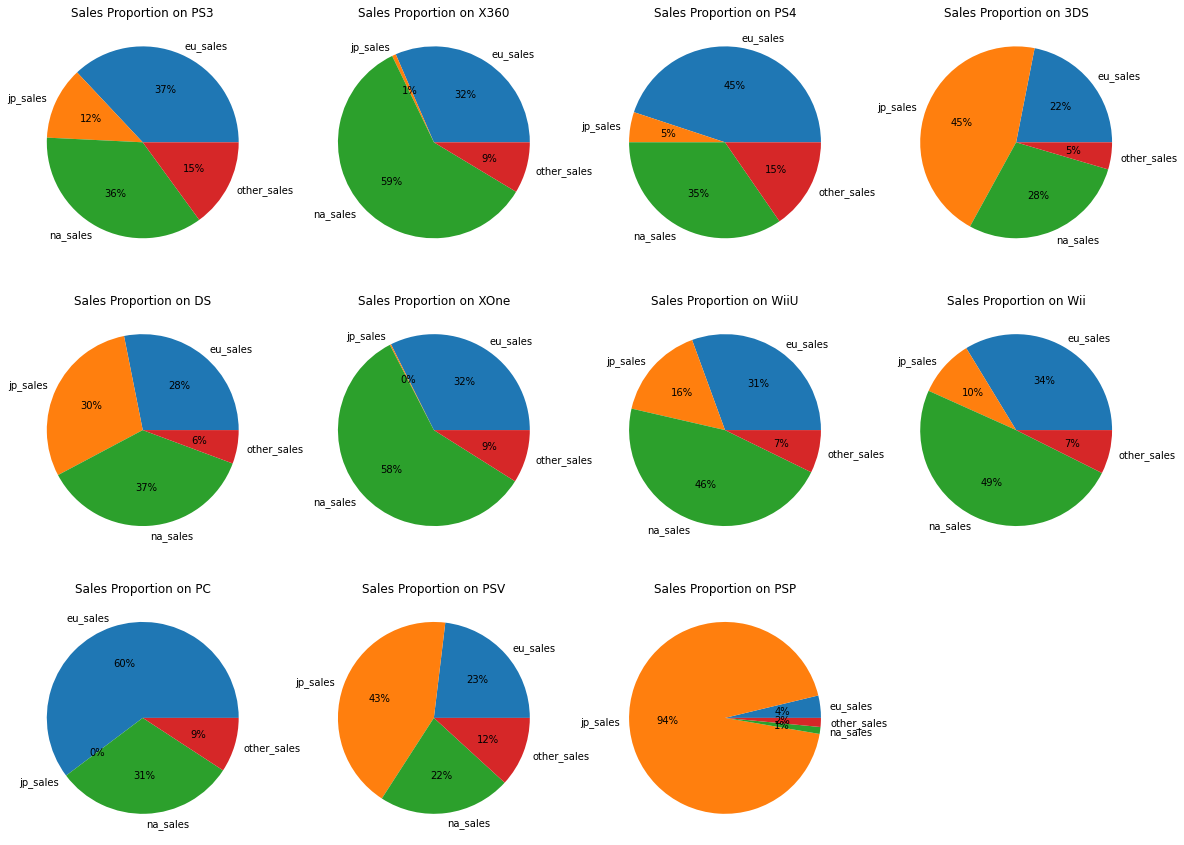

In [65]:
i = 1
plt.figure(figsize=(20, 15))
# plotting data on chart
for platform in platforms:
    plt.subplot(3, 4, i)
    plt.title(f'Sales Proportion on {platform}')
    plt.pie(platform_sales[platform], labels=platform_sales['index'], autopct='%.0f%%')
    i = i + 1 

In [66]:
genres = df_games_last_5_years.genre.unique()
genres = genres[~pd.isnull(genres)]
genres

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [67]:
genre_sales = pd.pivot_table(df_games_last_5_years, index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').T.reset_index()
genre_sales

genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,eu_sales,159.34,9.46,10.79,26.32,21.41,1.40,27.29,48.53,113.47,14.55,69.09,5.17
1,jp_sales,52.80,8.24,9.44,12.86,8.63,2.14,2.50,65.44,9.23,10.41,8.01,2.88
2,na_sales,177.84,8.92,19.79,38.19,25.38,1.13,17.22,64.00,144.77,7.97,81.53,4.23
3,other_sales,51.14,2.81,4.47,7.67,5.58,0.22,6.49,14.83,37.26,2.19,22.44,1.06


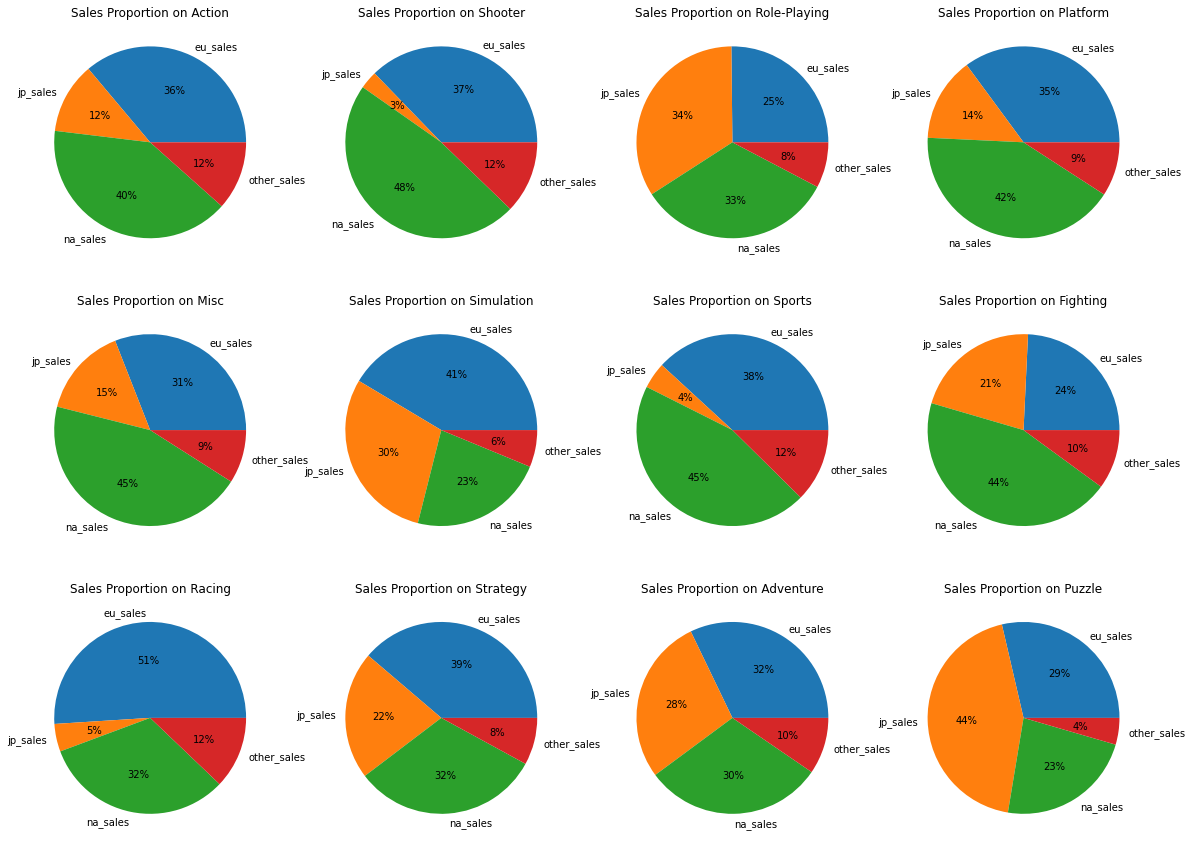

In [68]:
i = 1
plt.figure(figsize=(20, 15))
# plotting data on chart
for genre in genres:
    plt.subplot(3, 4, i)
    plt.title(f'Sales Proportion on {genre}')
    plt.pie(genre_sales[genre], labels=genre_sales['index'], autopct='%.0f%%')
    i = i + 1 

- Findings :
  - in NA region 5 top sales platforms are : X360, PS3, XOne, PS4 (with rating M) and X360(with rating E)
  - in EU region 5 top sales platforms are : PS4, PS3, X360 (with rating M) and PS4, PS3(with rating E)
  - in JP region 5 top sales platforms are : 3DS(with rating E), PS3(rating M), PS3(rating T), WiiU(with rating E) and 3DS(rating T)
  - in NA region 5 top sales genre are : Shooter(rating M), Action(rating M),Sport(rating E),Action(rating E10+),Role-Playing(rating M)
  - in EU region 5 top sales genre are : Action(rating M), Shooter(rating M),Sport(rating E),Action(rating E10+),Role-Playing(rating M)
  - in JP region 5 top sales genre are : Role-Playing(rating T), Action(rating M),Platform(rating E),Action(rating T),Role-Simulation(rating E)

- Insight :
  - each region has specific popular platform and genre
  - ESRB rating affecting the sales for each region
  - for upcoming years develop games with rating M, E and T

## Hypotheses testing

- The average user rating of Xbox One and PC platforms is the SAME.
- The average user rating of Action and Sports genre is NOT SAME

Describe:
- define the null hypothesis and an alternative hypothesis
- statistical significance value

### The average user rating of Xbox One and PC platforms is the same

note :
- numerical vs numerical
- methode : Independent T-Test
- Hipotesis :
 - H0 (null Hypothesis) = The average user rating of Xbox One and PC platforms is the SAME
 - H1 (Alternative Hypothesis) = The average user rating of Xbox One and PC platforms is the NOT SAME
- alpha = 0.05

In [69]:
def verdict (p_value, alpha = 0.05):
    print ('P-Value:',p_value)
    if p_value < alpha:
        print ('H1 Accepted / H0 Rejected')
    else :
        print ('H0 Accepted / H1 Rejected')

In [70]:
#prepare the dataset
df_games_platform_area = df_games_last_5_years.groupby(['platform','user_score']).agg({'total_sales' : 'sum'}).sort_values('total_sales', ascending=False).reset_index()
df_games_platform_XOne = df_games_platform_area[df_games_platform_area['platform']=='XOne'].reset_index(drop=True)
#df_games_platform_area
df_games_platform_PC = df_games_platform_area[df_games_platform_area['platform']=='PC'].reset_index(drop=True)


In [71]:
#calculate varian
np.var(df_games_platform_XOne['user_score']),np.var(df_games_platform_PC['user_score'])

(3.4169319492502885, 4.055447460360118)

In [72]:
#check median
np.mean(df_games_platform_XOne['user_score']),np.mean(df_games_platform_PC['user_score'])

(6.258823529411766, 5.6786885245901635)

In [73]:
#testing hypotheses
verdict(ttest_ind(df_games_platform_XOne['user_score'],df_games_platform_PC['user_score'],equal_var=True).pvalue)


P-Value: 0.12123548533521136
H0 Accepted / H1 Rejected


### The average user rating of Action and Sports genre is NOT SAME

note :
- numerical vs numerical
- methode : Independent T-Test
- Hipotesis :
 - H0 (null Hypothesis) = The average user rating of Action and Sports genre is NOT SAME
 - H1 (Alternative Hypothesis) = The average user rating of Action and Sports genre is SAME
- alpha = 0.05

In [74]:
#prepare dataset
df_games_genre_area = df_games_last_5_years.groupby(['genre','user_score']).agg({'total_sales' : 'sum'}).sort_values('total_sales', ascending=False).reset_index()
df_games_genre_action = df_games_genre_area[df_games_genre_area['genre']=='Action'].reset_index(drop=True)

df_games_genre_sport= df_games_genre_area[df_games_genre_area['genre']=='Sports'].reset_index(drop=True)


In [75]:
#calculate varian
np.var(df_games_genre_action['user_score']),np.var(df_games_genre_sport['user_score'])

(4.110596877869606, 4.704003027681662)

In [76]:
#check median
np.mean(df_games_genre_action['user_score']),np.mean(df_games_genre_sport['user_score'])

(5.7696969696969695, 4.9338235294117645)

In [77]:
#testing hypothesis
verdict(ttest_ind(df_games_genre_action['user_score'],df_games_genre_sport['user_score'],equal_var=True).pvalue)

P-Value: 0.023857457208212994
H1 Accepted / H0 Rejected


### Hypotheses testing Conclussion

 - The average user rating of Xbox One and PC platforms is the SAME
 - varian and mean value of user rating Xbox and PC Platform is not signifcantyly different
 - The average user rating of Action and Sports genre is SAME
 - varian and mean value of user rating Action and Sports genre is not signifcantyly different

## CONCLUSSION


- Findings
 - base on the distribution of the game_count vs year_of_release, we can see that starting 1997, every 5 years game count was changed signifcantly (around 400 )
 - 2001 to 2002 game count was increased from 482 to 829
 - 2006 to 2007 game count was increased from 1006 to 1466
 - 2011 to 2012 game count was decreased from 1136 to 635
 - biggest total sales is PS2 = 1255.77 milion USD
 - lowest total sales is PCFX = 0.03 milion USD
 - PS2 sales starting in 2000 with total sales 39.17 milion USD
 - PS2 sales finished in 2011 with total sales 0.45 milion USD
 - PS2 lifetime is 12 years
   - Platforms that used to be popular but now don't have any sales :
   - 2600
   - DC
   - DS
   - GB
   - GBA
   - GC
   - GEN
   - N64
   - NES
   - PS
   - PS2
   - PSP
   - SAT
   - SCD
   - SNFS
   - Wii
   - XB
  
 - Platforms don't have any sales from beginning :
   - 3DO
   - GG
   - NG
   - PCFX
   - TG16
   - WS
 - in general, new game platforms will be emerging every 3 years and old platforms fade the popularity within 5 - 10 years
 - seems that every 5 years the game behaviour were changing
 - Based on the previous data analysis we decided to used last 5 years data for developing benchmark for upcoming years
 - platform with most sales in last 5 years is PS4 with total sales = 314.14 milion USD
 - growing platform in last 5 years :
   - Xone
   - PS4
 - growing platform in last 5 years :
   - 3DS
   - DS
   - PC
   - PS3
   - PSP
   - PSV
   - Wii
   - WiiU
   - X360
  - the most 5 highest games sales have significant value with the rest, the different value for 5th rank (Xone) with 6th rank (WiiU) up to 77 milion USD
  - along with 5 most highest  sales, the mean value also indicating that 5 most highes sales has significantly different with the rest game, the different value for 5th rank (Xone) with 6th rank (WiiU) up to 35.4 milion USD
  - correlation between critic_score & total_sales is 0.3387
  - correlation between user_score & total_sales is -0.03195
  - The most profitable games are Action, Shooter, Role-Playing and sports
  - the highest sales is a games with Action genre
  - the lowest sales is a games with Puzzle genre
  - in NA region 5 top sales platforms are : X360, PS3, XOne, PS4 (with rating M) and X360(with rating E)
  - in EU region 5 top sales platforms are : PS4, PS3, X360 (with rating M) and PS4, PS3(with rating E)
  - in JP region 5 top sales platforms are : 3DS(with rating E), PS3(rating M), PS3(rating T), WiiU(with rating E) and 3DS(rating T)
  - in NA region 5 top sales genre are : Shooter(rating M), Action(rating M),Sport(rating E),Action(rating E10+),Role-Playing(rating M)
  - in EU region 5 top sales genre are : Action(rating M), Shooter(rating M),Sport(rating E),Action(rating E10+),Role-Playing(rating M)
  - in JP region 5 top sales genre are : Role-Playing(rating T), Action(rating M),Platform(rating E),Action(rating T),Role-Simulation(rating E)
  - The average user rating of Xbox One and PC platforms is the SAME
  - varian and mean value of user rating Xbox and PC Platform is not signifcantyly different
  - The average user rating of Action and Sports genre is SAME
  - varian and mean value of user rating Action and Sports genre is not signifcantyly different
  
  
- Insight :
 - platform that potentialy make a profit ( because of total sales and the lifetime )
   - PS4
   - PS3
   - X360
   - 3DS
   - Xone
  - critic_score & total_sales as moderate postive corelation, its mean that critic score is not strong enough to the total sales, but the corelation is positive its mean that both of variable is goes up ( when critic sore higher and the total sales will be higher also)
  - user_score & total_sales as weak negative corelation, its mean that the user score is dificult to measure to the total sales, and negative value corelation meaning that the user score goes less and the total sales will be goes up
  - develop games with Action, Shooter, Role-Playing and sports genre for upcoming years
  - each region has specific popular platform and genre
  - ESRB rating affecting the sales for each region
  - for upcoming years develop games with rating M, E and T

- Recomendation for upcoming year(2017) campaign
  - Focus on game platform with the most potentialy profit (PS4, PS3, X360, 3DS, Xone)
  - use critic_score and user_score value as a recomendation for chosing game platforms and genres
  - campaign strategies each region are different, should be refer on the popular platforms,genres
  
  
